In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns

from utils.statistics import check_normality, check_homoscedasticity, check_group_difference

## Neural Networks

### Simple RegressionNet

In [60]:
df = pd.read_csv("../results/tuning/simple_regression_netA.csv", sep=";")
metric = "F1-Score"
#assert check_normality(df[metric])

#### Look Back Window Size

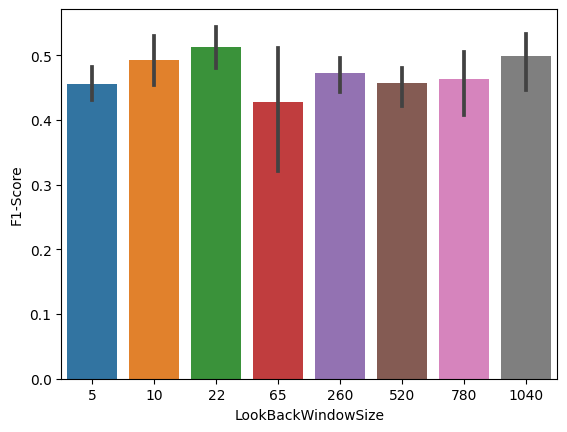

In [61]:
sns.barplot(x="LookBackWindowSize", y=metric, data=df);

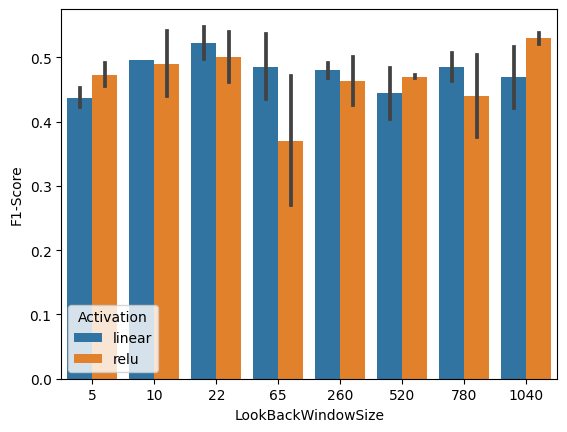

In [62]:
sns.barplot(x="LookBackWindowSize", y=metric, hue="Activation", data=df);

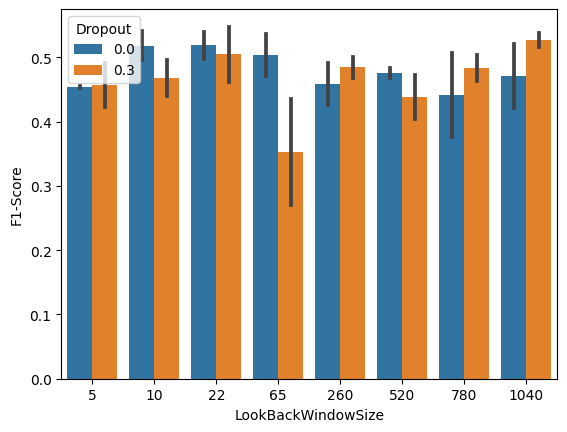

In [63]:
#assert check_homoscedasticity(*[df[df["Normalization"]==val][metric] for val in df["Normalization"].unique()])
#print("Significant group difference:", check_group_difference(df[df["Normalization"]==True][metric], df[df["Normalization"]==False][metric]))
#print(round(df.groupby("Normalization")[metric].mean()*100).astype(int))
sns.barplot(x="LookBackWindowSize", y=metric, hue="Dropout", data=df);

#### Dropout

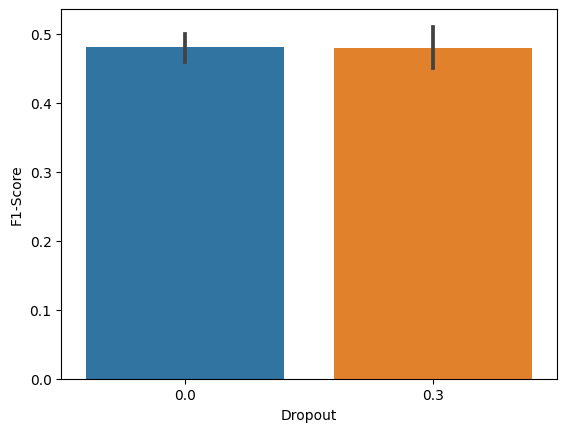

In [36]:
sns.barplot(x="Dropout", y=metric, data=df);

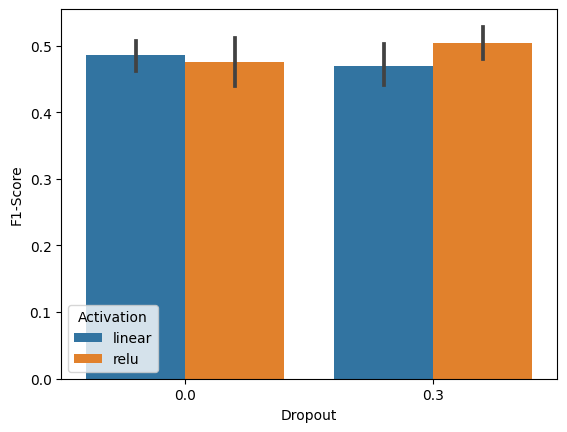

In [48]:
sns.barplot(x="Dropout", y=metric, hue="Activation", data=df);

Significant group difference: True


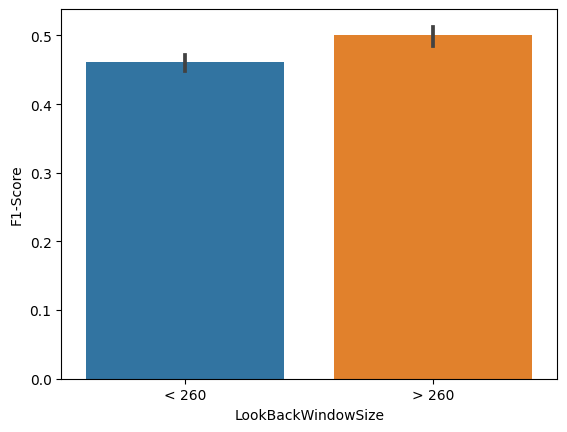

In [25]:
lbws_under_one_year = df[df["LookBackWindowSize"] < 260].copy()
lbws_over_one_year = df[df["LookBackWindowSize"] > 260].copy()
assert check_homoscedasticity(lbws_under_one_year[metric], lbws_over_one_year[metric])
print("Significant group difference:", check_group_difference(lbws_under_one_year[metric], lbws_over_one_year[metric]))
lbws_under_one_year["LookBackWindowSize"] = "< 260"
lbws_over_one_year["LookBackWindowSize"] = "> 260"
sns.barplot(x="LookBackWindowSize", y=metric, data=pd.concat([lbws_under_one_year, lbws_over_one_year]));

#### Conclusion
- Normalization (on vs off) does not significantly affect F1 scores.
- The Look Back Window Size makes a significant difference: >1 year is better than <1 year.

### Recurrent RegressionNet